In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import shutil
import patoolib
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

In [2]:
patoolib.extract_archive("./b6fftwbr2v-1/FruitNet_Processed Images.rar", outdir="./fruits")

patool: Extracting ./b6fftwbr2v-1/FruitNet_Processed Images.rar ...
patool: running "C:\Program Files\7-Zip\7z.EXE" x -o./fruits -- "./b6fftwbr2v-1/FruitNet_Processed Images.rar"
patool: ... ./b6fftwbr2v-1/FruitNet_Processed Images.rar extracted to `./fruits'.


'./fruits'

In [3]:
good_a = os.listdir('fruits/Processed Images_Fruits/Good Quality_Fruits/Apple_Good')
bad_a = os.listdir('fruits/Processed Images_Fruits/Bad Quality_Fruits/Apple_Bad')

good_b = os.listdir('fruits/Processed Images_Fruits/Good Quality_Fruits/Banana_Good')
bad_b = os.listdir('fruits/Processed Images_Fruits/Bad Quality_Fruits/Banana_Bad')

good_g = os.listdir('fruits/Processed Images_Fruits/Good Quality_Fruits/Guava_Good')
bad_g = os.listdir('fruits/Processed Images_Fruits/Bad Quality_Fruits/Guava_Bad')

good_l = os.listdir('fruits/Processed Images_Fruits/Good Quality_Fruits/Lime_Good')
bad_l = os.listdir('fruits/Processed Images_Fruits/Bad Quality_Fruits/Lime_Bad')

good_o = os.listdir('fruits/Processed Images_Fruits/Good Quality_Fruits/Orange_Good')
bad_o = os.listdir('fruits/Processed Images_Fruits/Bad Quality_Fruits/Orange_Bad')

good_p = os.listdir('fruits/Processed Images_Fruits/Good Quality_Fruits/Pomegranate_Good')
bad_p = os.listdir('fruits/Processed Images_Fruits/Bad Quality_Fruits/Pomegranate_Bad')

good_images = good_a + good_b + good_g + good_l + good_o + good_p
bad_images = bad_a + bad_b + bad_g + bad_l + bad_o + bad_p

In [4]:
os.mkdir('good_all')
for image in good_a:
    new_path = 'good_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Good Quality_Fruits/Apple_Good/' + image, new_path)
    
for image in good_b:
    new_path = 'good_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Good Quality_Fruits/Banana_Good/' + image, new_path)
    
for image in good_g:
    new_path = 'good_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Good Quality_Fruits/Guava_Good/' + image, new_path)
    
for image in good_l:
    new_path = 'good_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Good Quality_Fruits/Lime_Good/' + image, new_path)
    
for image in good_o:
    new_path = 'good_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Good Quality_Fruits/Orange_Good/' + image, new_path)
    
for image in good_p:
    new_path = 'good_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Good Quality_Fruits/Pomegranate_Good/' + image, new_path)
    
os.mkdir('bad_all')
for image in bad_a:
    new_path = 'bad_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Bad Quality_Fruits/Apple_Bad/' + image, new_path)
    
for image in bad_b:
    new_path = 'bad_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Bad Quality_Fruits/Banana_Bad/' + image, new_path)
    
for image in bad_g:
    new_path = 'bad_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Bad Quality_Fruits/Guava_Bad/' + image, new_path)
    
for image in bad_l:
    new_path = 'bad_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Bad Quality_Fruits/Lime_Bad/' + image, new_path)
    
for image in bad_o:
    new_path = 'bad_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Bad Quality_Fruits/Orange_Bad/' + image, new_path)
    
for image in bad_p:
    new_path = 'bad_all/' + image
    shutil.copy('fruits/Processed Images_Fruits/Bad Quality_Fruits/Pomegranate_Bad/'+ image, new_path)

In [70]:
y = np.zeros(len(good_images))
X = good_images
g_train, g_test, y_train, y_test = train_test_split(X, y, test_size = .4)
g_test, g_val, y_test, y_val = train_test_split(g_test, y_test, test_size = .25)


y1 = np.ones(len(bad_images))
X1 = bad_images
b_train, b_test, y_train, y_test = train_test_split(X1, y1, test_size = .4)
b_test, b_val, y_test, y_val = train_test_split(b_test, y_test, test_size = .25)

In [6]:
os.mkdir('good_train')
for image in g_train:
    new_path = 'good_train/' + image
    shutil.copy('good_all/' + image, new_path)
shutil.move('good_train', './fruits/apples/Train/good')

os.mkdir('good_test')
for image in g_test:
    new_path = 'good_test/' + image
    shutil.copy('good_all/' + image, new_path)
shutil.move('good_test', './fruits/apples/Test/good')

os.mkdir('good_val')
for image in g_val:
    new_path = 'good_val/' + image
    shutil.copy('good_all/' + image, new_path)
shutil.move('good_val', './fruits/apples/Validation/good')

os.mkdir('bad_train')
for image in b_train:
    new_path = 'bad_train/' + image
    shutil.copy('bad_all/' + image, new_path)
shutil.move('bad_train', './fruits/apples/Train/bad')

os.mkdir('bad_test')
for image in b_test:
    new_path = 'bad_test/' + image
    shutil.copy('bad_all/' + image, new_path)
shutil.move('bad_test', './fruits/apples/Test/bad')

os.mkdir('bad_val')
for image in b_val:
    new_path = 'bad_val/' + image
    shutil.copy('bad_all/' + image, new_path)
shutil.move('bad_val', './fruits/apples/Validation/bad')

'./fruits/apples/Validation/bad'

In [346]:

IMAGE_SIZE = 200
img_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip=False)

In [347]:
Train_generator = img_datagen.flow_from_directory(
        'fruits/apples/Train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size = 100
        #class_mode="sparse"
)

Found 10880 images belonging to 2 classes.


In [348]:
Test_generator = img_datagen.flow_from_directory(
        'fruits/apples/Test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size = 50
        #class_mode="sparse"
)

Found 5485 images belonging to 2 classes.


In [349]:
Val_generator = img_datagen.flow_from_directory(
        'fruits/apples/Validation',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size = 15
        #class_mode="sparse"
)

Found 1841 images belonging to 2 classes.


In [350]:
train_images, train_labels = next(Train_generator)
test_images, test_labels = next(Test_generator)
val_images, val_labels = next(Val_generator)

In [351]:
train_y = np.reshape(train_labels[:,0], (100,1))
test_y = np.reshape(test_labels[:,0], (50,1))
val_y = np.reshape(val_labels[:,0], (15,1))

In [356]:
trainCallback = EarlyStopping(monitor='loss', min_delta = 0.0001, patience = 20)

model_1 = Sequential()
model_1.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', 
                   input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model_1.add(MaxPooling2D(pool_size = (2,2)))

#model_1.add(Conv2D(filters = 32, kernel_size = (4,4), activation = 'relu'))
#model_1.add(MaxPooling2D(pool_size = (2,2)))

#model_1.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
#model_1.add(MaxPooling2D(pool_size = (2,2)))

model_1.add(Flatten())

#model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dropout(0.1))
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dense(32, activation = 'relu'))
model_1.add(Dense(1, activation = 'sigmoid'))

model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [357]:
result_1 = model_1.fit(train_images, 
                       train_y, 
                       validation_data= (test_images, test_y),
                       epochs = 300, 
                       callbacks = [trainCallback], 
                       batch_size = 32)

Epoch 1/300
4/4 [==============================] - 1s 238ms/step - loss: 16.2206 - accuracy: 0.6100 - val_loss: 6.5437 - val_accuracy: 0.2800
Epoch 2/300
4/4 [==============================] - 1s 282ms/step - loss: 2.9135 - accuracy: 0.5700 - val_loss: 0.6385 - val_accuracy: 0.7200
Epoch 3/300
4/4 [==============================] - 1s 272ms/step - loss: 0.9162 - accuracy: 0.5300 - val_loss: 0.6566 - val_accuracy: 0.7200
Epoch 4/300
4/4 [==============================] - 1s 266ms/step - loss: 0.6438 - accuracy: 0.6500 - val_loss: 0.5547 - val_accuracy: 0.6800
Epoch 5/300
4/4 [==============================] - 1s 274ms/step - loss: 0.4868 - accuracy: 0.8000 - val_loss: 0.5108 - val_accuracy: 0.6800
Epoch 6/300
4/4 [==============================] - 1s 243ms/step - loss: 0.4961 - accuracy: 0.7600 - val_loss: 0.5137 - val_accuracy: 0.7000
Epoch 7/300
4/4 [==============================] - 1s 262ms/step - loss: 0.3807 - accuracy: 0.8500 - val_loss: 0.4509 - val_accuracy: 0.7200
Epoch 8/300


Epoch 59/300
4/4 [==============================] - 1s 238ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3948 - val_accuracy: 0.8800
Epoch 60/300
4/4 [==============================] - 1s 239ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4578 - val_accuracy: 0.8800
Epoch 61/300
4/4 [==============================] - 1s 240ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4912 - val_accuracy: 0.8800
Epoch 62/300
4/4 [==============================] - 1s 254ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4507 - val_accuracy: 0.8800
Epoch 63/300
4/4 [==============================] - 1s 260ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4281 - val_accuracy: 0.8800
Epoch 64/300
4/4 [==============================] - 1s 255ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4257 - val_accuracy: 0.8800
Epoch 65/300
4/4 [==============================] - 1s 245ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4275 - val_accuracy: 0.8800
Epoch 

4/4 [==============================] - 1s 242ms/step - loss: 3.8532e-04 - accuracy: 1.0000 - val_loss: 0.5220 - val_accuracy: 0.9000
Epoch 116/300
4/4 [==============================] - 1s 244ms/step - loss: 3.8882e-04 - accuracy: 1.0000 - val_loss: 0.5333 - val_accuracy: 0.8800
Epoch 117/300
4/4 [==============================] - 1s 227ms/step - loss: 3.7159e-04 - accuracy: 1.0000 - val_loss: 0.5577 - val_accuracy: 0.8800
Epoch 118/300
4/4 [==============================] - 1s 267ms/step - loss: 3.7118e-04 - accuracy: 1.0000 - val_loss: 0.5730 - val_accuracy: 0.8800
Epoch 119/300
4/4 [==============================] - 1s 275ms/step - loss: 3.8379e-04 - accuracy: 1.0000 - val_loss: 0.5604 - val_accuracy: 0.8800
Epoch 120/300
4/4 [==============================] - 1s 249ms/step - loss: 3.5058e-04 - accuracy: 1.0000 - val_loss: 0.5430 - val_accuracy: 0.8800
Epoch 121/300
4/4 [==============================] - 1s 260ms/step - loss: 3.3281e-04 - accuracy: 1.0000 - val_loss: 0.5327 - val_ac

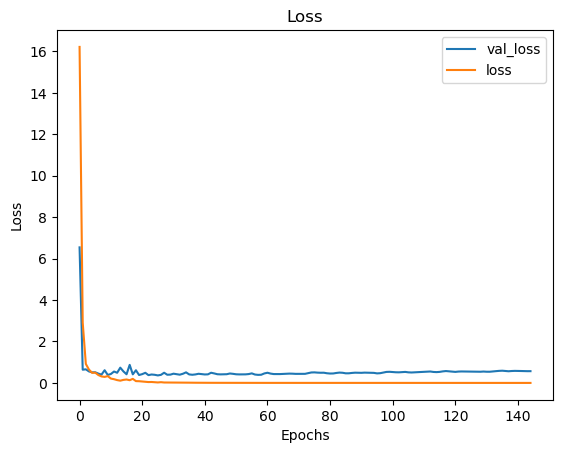

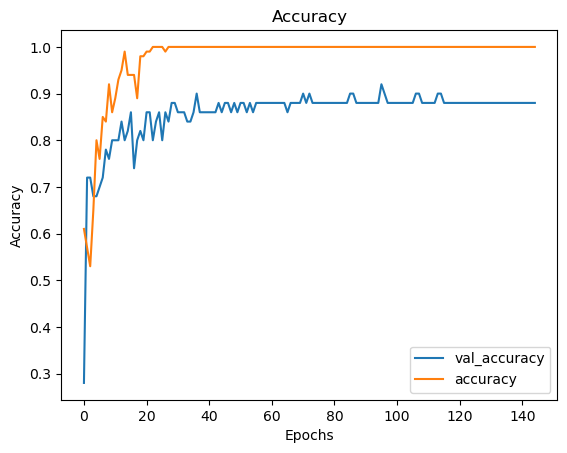

In [358]:
visualize_training_results(result_1)

In [359]:
model_1.evaluate(val_images, val_y)

1/1 [==============================] - 0s 46ms/step - loss: 0.3237 - accuracy: 0.9333


[0.3236570656299591, 0.9333333373069763]

In [260]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()


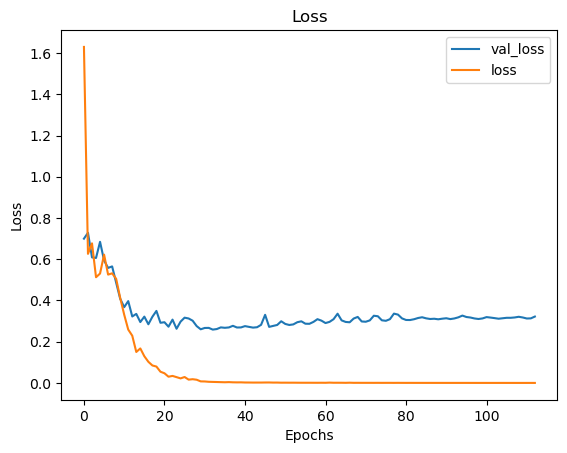

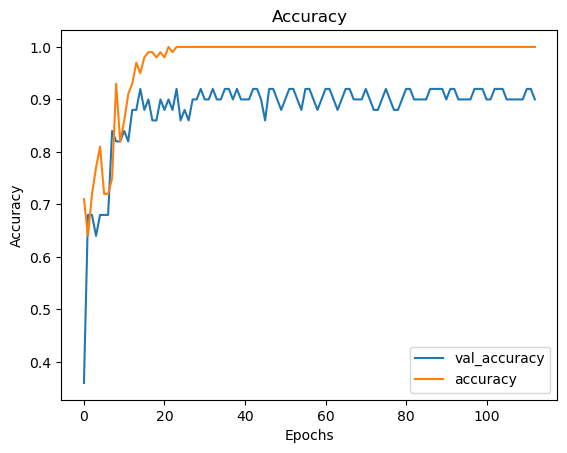

In [321]:
visualize_training_results(result_1)

In [52]:
model_1.predict(pred_generator)

1/1 [==============================] - 0s 56ms/step


array([[0.],
       [1.],
       [0.]], dtype=float32)

In [51]:
pred_datagen = ImageDataGenerator(horizontal_flip=False)

pred_generator = pred_datagen.flow_from_directory(
        'fruits/rot_test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3 images belonging to 1 classes.


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import optimizers